In [1]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


#IMPORTING LIBRARIES

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('heart.csv')
#used to read csv files and perform operations on it

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#HANDLING CATEGORICAL DATA

In [4]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
x = df.iloc[:, :-1].values 
y = df.iloc[:, -1].values 
labelencoder_X1 = LabelEncoder()
x[:,0] = labelencoder_X1.fit_transform(x[:,0])
x[:,1] = labelencoder_X1.fit_transform(x[:,1])
print(x)
#Here we are using LabelEncoder

[[29.  1.  3. ...  0.  0.  1.]
 [ 3.  1.  2. ...  0.  0.  2.]
 [ 7.  0.  1. ...  2.  0.  2.]
 ...
 [34.  1.  0. ...  1.  2.  3.]
 [23.  1.  0. ...  1.  1.  3.]
 [23.  0.  1. ...  1.  1.  2.]]


#SPLITTING OF DATA INTO TRAINING AND TEST

In [5]:
from sklearn.model_selection import train_test_split

#import model selection train test split for splitting the data into test and train for model validation.

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)


#NORMALIZING DATA

In [7]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
X_train_norm = norm.transform(x_train)

# transform testing data
X_test_norm = norm.transform(x_test)

print(X_train_norm)
print(X_test_norm)

[[0.         1.         0.33333333 ... 1.         0.         0.66666667]
 [0.5        0.         0.66666667 ... 1.         0.         0.66666667]
 [0.9        1.         0.         ... 0.         0.         1.        ]
 ...
 [0.3        1.         0.33333333 ... 1.         0.         1.        ]
 [0.175      1.         0.33333333 ... 0.5        0.         0.33333333]
 [0.35       0.         0.66666667 ... 1.         0.         0.66666667]]
[[0.525      1.         0.         ... 0.         0.         1.        ]
 [0.45       1.         0.66666667 ... 1.         0.         1.        ]
 [0.6        0.         0.         ... 0.5        0.         0.66666667]
 ...
 [0.6        1.         0.66666667 ... 1.         0.         0.66666667]
 [0.375      0.         0.         ... 1.         0.         0.66666667]
 [0.525      0.         0.         ... 0.5        0.         0.66666667]]


#GRAPHS

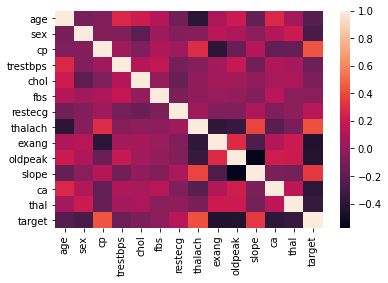

In [8]:
sns.heatmap(df.corr())

#ALGORITHM

In [9]:
knn = KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')

#FITTING OF TRAINING DATA

In [10]:
knn.fit(x_train,y_train)
#training or fitting the train data into the model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

#PREDICTIONS FOR OUR PROBLEM STATEMENT WITH THE RELATED GRAPHS

In [11]:
predictions = knn.predict(x_test)

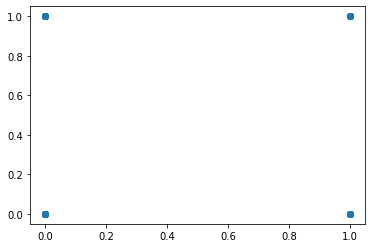

In [12]:
plt.scatter(y_test,predictions)
#to visualise the predictions and the test Y !! almost it is forming a linear line with less deviation

#EVALUATION

In [13]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.3360655737704918
MSE: 0.3360655737704918
RMSE: 0.5797116298389156


In [14]:
print(metrics.accuracy_score(y_test, predictions))

0.6639344262295082


#SAVING THE MODEL USING PICKLE LIBRARY

In [15]:
import pickle 

# Save the trained model as a pickle string. 
saved_model = pickle.dumps(knn) 

# Load the pickled model 
lm_from_pickle = pickle.loads(saved_model) 

# Use the loaded pickled model to make predictions 
lm_from_pickle.predict(x_test) 


array([0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0])

#ACCURACY w.r.t TRAINED DATA

Confusion Matrix


In [17]:
from sklearn.metrics import confusion_matrix
predictions=predictions[0:72]
y_train=y_train[0:72]
results =confusion_matrix(y_train, predictions)
print(results)

[[10 22]
 [15 25]]


Precision, Recall, Support, Fscore

In [18]:
import numpy
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_train, predictions, average='macro')

(0.46595744680851064, 0.46875, 0.4627949183303085, None)

#ACCURACY w.r.t TEST DATA

Confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix
y_test=y_test[0:72]
results =confusion_matrix(y_test, predictions)
print(results)

[[17 18]
 [ 8 29]]


Precision, Recall, Support, Fscore

In [20]:
import numpy
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_test, predictions, average='macro')

(0.6485106382978724, 0.6347490347490348, 0.6285714285714286, None)